<a href="https://colab.research.google.com/github/tiagoboeing/fuzzy-consumo-combustivel/blob/master/init.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Consumo de combustível

As variáveis que impactam no consumo de combustível do veículo são:

- A velocidade que o mesmo se encontra;
- A temperatura do ar condicionado.

### Regras

- SE **velocidade_baixa** e **temperatura_baixa** → CONSUMO BAIXO
- SE **velocidade_baixa** e **temperatura_alta** → CONSUMO MEDIO
- SE **velocidade_media** e **temperatura_baixa** → CONSUMO BAIXO
- SE **velocidade_media** e **temperatura_alta** → CONSUMO ALTO
- SE **velocidade_alta** e **temperatura_baixa** → CONSUMO MEDIO

# Instala dependências

In [1]:
!pip install networkx
!pip install scikit-fuzzy

     |████████████████████████████████| 1.0MB 8.9MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp36-none-any.whl size=894070 sha256=f546d8069051af57b52a37db6b93c89980cc95a8b6928c7180b3c13906c18279
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


## Definição das regras

In [0]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# variáveis
velocidade = ctrl.Antecedent(np.arange(0, 150, 1), 'velocidade')
temperatura = ctrl.Antecedent(np.arange(15, 30, 1), 'temperatura')
consumo = ctrl.Consequent(np.arange(2, 20, 1), 'consumo') # considerando km/L

consumo.automf(names=['baixo', 'medio', 'alto'])

# pertinência
velocidade['baixa'] = fuzz.trimf(velocidade.universe, [0, 30, 60])
velocidade['media'] = fuzz.trapmf(velocidade.universe, [40, 60, 80, 100])
velocidade['alta'] = fuzz.trapmf(velocidade.universe, [80, 100, 180, 180])

temperatura['baixa'] = fuzz.trimf(temperatura.universe, [15, 19, 23])
temperatura['alta'] = fuzz.trimf(temperatura.universe, [20, 25, 30])

## Exibe funções de pertinência no gráfico

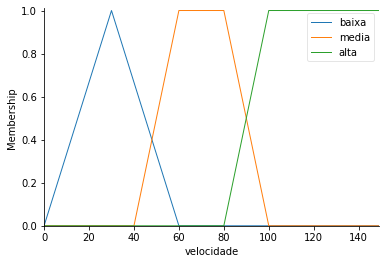

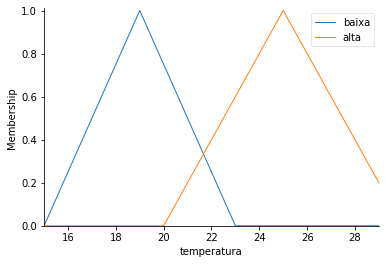

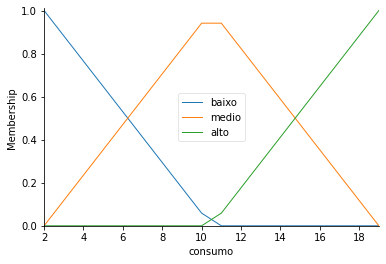

In [3]:
velocidade.view()
temperatura.view()
consumo.view()

## Decisões difusas

In [0]:
rule1 = ctrl.Rule(velocidade['baixa'] & temperatura['baixa'], consumo['baixo'])
rule2 = ctrl.Rule(velocidade['baixa'] & temperatura['alta'], consumo['medio'])
rule3 = ctrl.Rule(velocidade['media'] & temperatura['baixa'], consumo['baixo'])
rule4 = ctrl.Rule(velocidade['media'] & temperatura['alta'], consumo['alto'])
rule5 = ctrl.Rule(velocidade['alta'] & temperatura['baixa'], consumo['medio'])

## Controlador (informe dados aqui)

In [5]:
consumo_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
consumo_simulador = ctrl.ControlSystemSimulation(consumo_ctrl)

# ALTERE OS VALORES AQUI PARA SIMULAR
consumo_simulador.input['velocidade'] = 40
consumo_simulador.input['temperatura'] = 22

# Computando o resultado
consumo_simulador.compute()
print(consumo_simulador.output['consumo'])


10.130769098741911


## Resultado

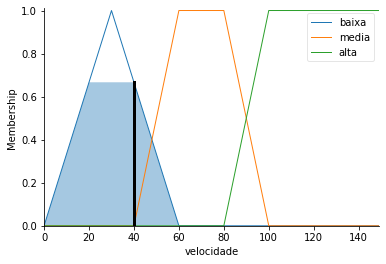

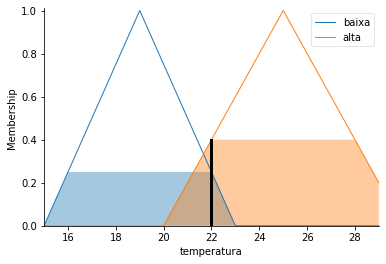

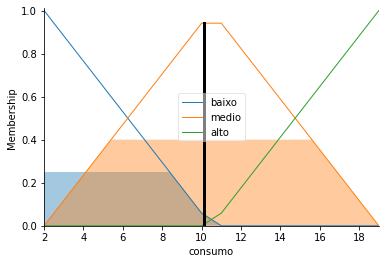

In [6]:
velocidade.view(sim=consumo_simulador)
temperatura.view(sim=consumo_simulador)
consumo.view(sim=consumo_simulador)